## Zipf's Law

I learned about this in Alex Bellos's book "The Grapes of Math" and wanted to experiment with it a little myself. 

Zipf's law says that $frequency = \frac{k}{rank^a}$, where $freqency$ is how many times a given word appears in a book, $rank$ is how common the word is in relation to other words (eg. the tenth-most common book has $rank = 10$), and $k$ and $a$ are constants. 

### Some code

Here's my implementation of this. All you need is a `.txt` file of a book, and you get some handy-dandy plots

In [1]:
import string
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import numpy as np
import math
import re

# Given a txt file, return a list of all lowercase words. 
def get_words(f_name):
    # read in a txt file of a book as a string
    f = open(f_name, "r", encoding='utf8')
    # keep only alphabetic characters and spaces
    regex = re.compile('[^a-zA-Z ]')
    words = regex.sub('', f.read())
    f.close()
    # make all the words lowercase
    words = words.lower()
    # split string of book into list of strings based on whitespace
    w = words.split()
    return w

In [6]:
words = get_words("gettysburg.txt")
print(words)

['four', 'score', 'and', 'seven', 'years', 'ago', 'our', 'fathers', 'brought', 'forthupon', 'this', 'continent', 'a', 'new', 'nation', 'conceived', 'in', 'liberty', 'anddedicated', 'to', 'the', 'proposition', 'that', 'all', 'men', 'are', 'created', 'equalnow', 'we', 'are', 'engaged', 'in', 'a', 'great', 'civil', 'war', 'testing', 'whetherthat', 'nation', 'or', 'any', 'nation', 'so', 'conceived', 'and', 'so', 'dedicated', 'can', 'long', 'endure', 'we', 'are', 'met', 'on', 'a', 'great', 'battlefield', 'of', 'that', 'warwe', 'have', 'come', 'to', 'dedicate', 'a', 'portion', 'of', 'that', 'field', 'as', 'a', 'final', 'resting', 'placefor', 'those', 'who', 'here', 'gave', 'their', 'lives', 'that', 'this', 'nation', 'might', 'liveit', 'is', 'altogether', 'fitting', 'and', 'proper', 'that', 'we', 'should', 'do', 'thisbut', 'in', 'a', 'larger', 'sense', 'we', 'cannot', 'dedicate', 'we', 'cannot', 'consecrate', 'we', 'cannot', 'hallow', 'this', 'ground', 'the', 'brave', 'men', 'living', 'and', 

In [7]:
# Given a list of strings, return a list of lists [x,y] where x = rank and y = frequency
def word_frequency(words):
    # create empty dictionary to store frequency of words, key = word (str), value = count (int)
    freq = {}
    for w in words:
        # if word's already been seen, increment wordcount count
        if w in freq.keys():
            freq[w] += 1
        # if it's a new word, add it to dictionary with 1 as word count
        else:
            freq[w] = 1
    # Rank words by frequency, most frequent on top. Returns list of tuples. 
    freq = sorted(freq.items(), key = lambda x: x[1], reverse = True)
    # convert this list of tuples (immutable) to list of lists
    freq = [list(x) for x in freq]
    # replace the word with an index to get [x,y] where x = rank
    for i in freq:
        i[0] = freq.index(i) + 1
    return freq

In [8]:
freq = word_frequency(words)
print(freq)

[[1, 11], [2, 10], [3, 9], [4, 7], [5, 7], [6, 6], [7, 5], [8, 5], [9, 5], [10, 5], [11, 5], [12, 4], [13, 4], [14, 3], [15, 3], [16, 3], [17, 3], [18, 3], [19, 3], [20, 3], [21, 3], [22, 3], [23, 3], [24, 2], [25, 2], [26, 2], [27, 2], [28, 2], [29, 2], [30, 2], [31, 2], [32, 2], [33, 2], [34, 2], [35, 2], [36, 2], [37, 2], [38, 2], [39, 2], [40, 2], [41, 2], [42, 2], [43, 2], [44, 1], [45, 1], [46, 1], [47, 1], [48, 1], [49, 1], [50, 1], [51, 1], [52, 1], [53, 1], [54, 1], [55, 1], [56, 1], [57, 1], [58, 1], [59, 1], [60, 1], [61, 1], [62, 1], [63, 1], [64, 1], [65, 1], [66, 1], [67, 1], [68, 1], [69, 1], [70, 1], [71, 1], [72, 1], [73, 1], [74, 1], [75, 1], [76, 1], [77, 1], [78, 1], [79, 1], [80, 1], [81, 1], [82, 1], [83, 1], [84, 1], [85, 1], [86, 1], [87, 1], [88, 1], [89, 1], [90, 1], [91, 1], [92, 1], [93, 1], [94, 1], [95, 1], [96, 1], [97, 1], [98, 1], [99, 1], [100, 1], [101, 1], [102, 1], [103, 1], [104, 1], [105, 1], [106, 1], [107, 1], [108, 1], [109, 1], [110, 1], [111,

In [9]:
# Given a list of lists [x,y], plot a log-log scatter plot
def log_plot(data, xlabel = "Rank", ylabel = "Frequency", title=""):
    x = [x for x, y in data]
    y = [y for x, y in data]
    fig, ax = plt.subplots()
    ax.scatter(x, y)
    ax.set_xscale("log", basex=10)
    ax.set_yscale("log", basey=10)
    for axis in [ax.xaxis, ax.yaxis]:
        axis.set_major_formatter(ScalarFormatter())
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    plt.show()

# f_name = string of txt file, the others are just labels
def analyze(f_name, xlabel, ylabel, title):
    words = get_words(f_name)
    data =  word_frequency(words)
    log_plot(data, xlabel, ylabel, title)

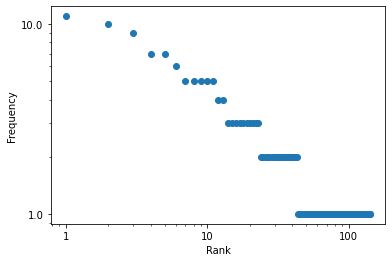

In [10]:
log_plot(freq)

Ok, let's test this using the full-text of the Gettysburg Address. 

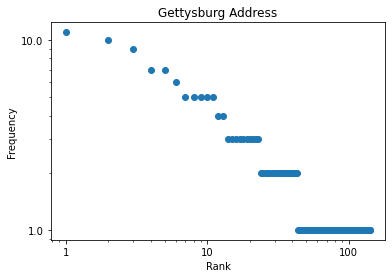

In [3]:
analyze("gettysburg.txt", "Rank", "Frequency", "Gettysburg Address")

There is clearly an inversely-proportional relationship here, but it's very "choppy" since this is such a small dataset. Let's try it with something larger like the full text of "Ulysses" by James Joyce. 

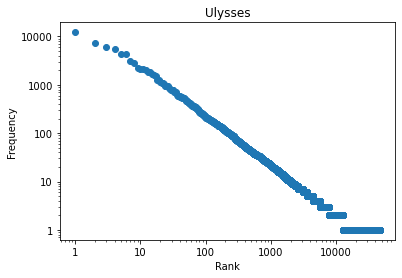

In [67]:
analyze("ulysses.txt", "Rank", "Frequency", "Ulysses")

Look at that nice inverse relationship! If you ignore all of the words that only appear once (the bottom right hand corner of the graph), you have an almost perfect inversely proportional relationship. Nifty!